# Predict the next number

For a given set of x,y create a program to calculate the next number for a given y.

based on calculation => x = 47.20807787786217 for y = 212.03383119374357, actual is 48
based on calculation => x = 49.94843858993715 for y = 222.77934249547693, actual is 49


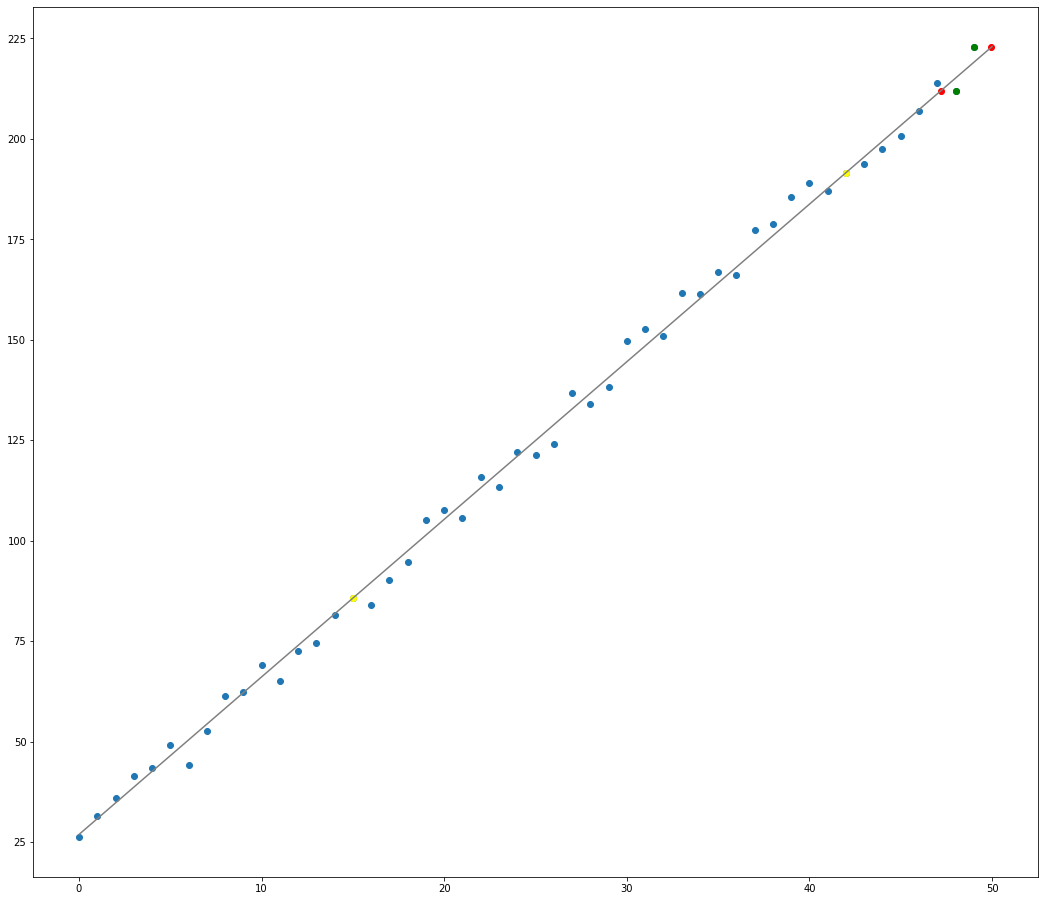

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

def calculate_line_slope(x1, y1, x2, y2):
    return (y2 - y1) / (x2 - x1)

def line_equation(x1, y1, x2, y2):
    m = calculate_line_slope(x1, y1, x2, y2)
    c = y1 - m * x1
    return m, c

def calculate_distance_from_line(m, c, x, y):
    #y = mx + c ==> 0 = mx - y + c
    #d = |ax+by+c|/√(a**2+b**2)
    #a=m, b=-1, c=c
    return abs(m * x - y + c) / math.sqrt(m**2 + 1)

def calculate_mean_distance(points, m, c):
    distances = [calculate_distance_from_line(m, c, x, y) for x, y in points]
    return sum(distances) / len(distances)

def find_line_combinations(points):
    comb = []
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            comb.append((points[i], points[j]))
    return comb


def find_best_fitting_line(points):
    min_mean_distance = float('inf')
    best_line = None
    line_pair = None

    for (x1, y1), (x2, y2) in find_line_combinations(points):
        try:
            m, c = line_equation(x1, y1, x2, y2)
            remaining_points = [(x, y) for x, y in points if (x, y) != (x1, y1) and (x, y) != (x2, y2)]
            if remaining_points:
                mean_distance = calculate_mean_distance(remaining_points, m, c)
                if mean_distance < min_mean_distance:
                    min_mean_distance = mean_distance
                    best_line = (m, c)
                    line_pair = [(x1, y1), (x2, y2)]
            elif best_line is None:
                # If only two points, this is the best line
                best_line = (m, c)
                min_mean_distance = 0
                line_pair = [(x1, y1), (x2, y2)]
        except ZeroDivisionError:
            # Handle vertical lines (slope is infinite)
            pass
    return best_line, min_mean_distance, line_pair

def predict_x(line, y):
    if line and line[0] != 0:
        return (y - line[1]) / line[0]
    elif line:
        return float('inf') # Or some other indicator for a vertical line
    else:
        return None

def plot_the_points(line,finalpoints,predicted_points,actual_points):
    
    x = np.linspace(0, 50, 400) 
    y = line[0] * x + line[1]
    plt.figure(figsize=(18, 16))
    plt.plot(x, y, color='grey')
    
    plt.scatter(xx, yy)
    
    plt.scatter(predicted_points[0][0],predicted_points[1][0],color='red')
    plt.scatter(predicted_points[0][1],predicted_points[1][1],color='red')
    
    plt.scatter(actual_points[0][0],actual_points[1][0],color='green')
    plt.scatter(actual_points[0][1],actual_points[1][1],color='green')
    
    plt.scatter(finalpoints[0][0], finalpoints[0][1],color='yellow')
    plt.scatter(finalpoints[1][0], finalpoints[1][1],color='yellow')

    plt.show()
# for given set of (x,y) values predict the next value for x for given y

# for given set of (x,y) values predict the next value for x for given y

from matplotlib import pyplot as plt
import random

random.seed(5)
xx = []
yy = []
for x in range(0, 50):
    y = 4*x+ 20 + 10*random.random()
    xx.append(x)
    yy.append(y)
    #print(x,y)

all_points = list(zip(xx,yy))
points = all_points[0:-2] # Corrected slicing to exclude the last two elements
#print(points)

best_line, mean_distance, finalpoints = find_best_fitting_line(points)

y1 = all_points[-2][1]
y2 = all_points[-1][1]

x1 = predict_x(best_line, y1)
x2 = predict_x(best_line, y2)

print(f"based on calculation => x = {x1} for y = {y1}, actual is {all_points[-2][0]}")
print(f"based on calculation => x = {x2} for y = {y2}, actual is {all_points[-1][0]}")

predicted_points = [(x1, x2), (y1, y2)]
actual_points = [(all_points[-2][0], all_points[-1][0]), (y1, y2)]

plot_the_points(best_line, finalpoints, predicted_points, actual_points)